<a href="https://colab.research.google.com/github/VenkateshMadhuvanthi/AI-Text-Classification/blob/main/DataNova_Practice_TinyBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataNova 2025**

# **TEXT CLASSIFICATION USING TinyBERT**

---


Step 1 **Importing Data**

In [ ]:
# Load the daigt_external_dataset.csv
import pandas as pd
df = pd.read_csv("/content/ai-ga-dataset.csv", engine='python', on_bad_lines='skip')

# Display the first few rows to understand its structure
display(df.head())

,title,abstract,label
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,0
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,0
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,0
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,0
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,0


In [ ]:
df2 = pd.read_csv("/content/AI_Human.csv", engine='python', on_bad_lines='skip')

# Display the first few rows to understand its structure
display(df2.head())

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [ ]:
# Rename columns in df2 to match df for concatenation
df2_renamed = df2.rename(columns={'text': 'abstract', 'generated': 'label'})

# Select only the relevant columns from df and df2_renamed
df_subset = df[['abstract', 'label']]
df2_subset = df2_renamed[['abstract', 'label']]

# Concatenate the two dataframes
combined_df = pd.concat([df_subset, df2_subset], ignore_index=True)

# Display the first few rows and the shape of the combined dataframe
display(combined_df.head())
print(f"Shape of combined dataframe: {combined_df.shape}")

,abstract,label
0,OBJECTIVE: This retrospective chart review des...,0.0
1,Inflammatory diseases of the respiratory tract...,0.0
2,Surfactant protein-D (SP-D) participates in th...,0.0
3,Endothelin-1 (ET-1) is a 21 amino acid peptide...,0.0
4,Respiratory syncytial virus (RSV) and pneumoni...,0.0


Shape of combined dataframe: (66195, 2)


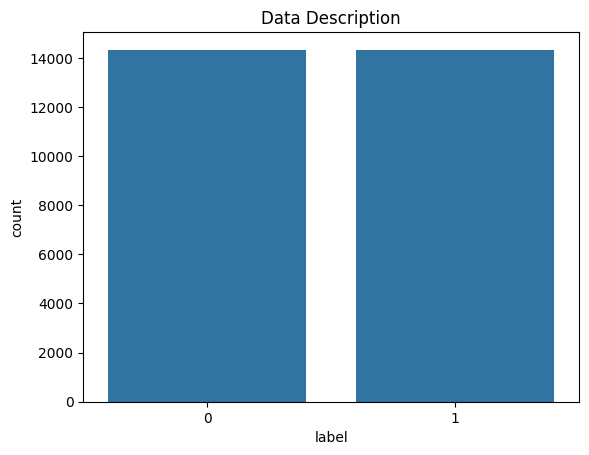

In [ ]:
# Dataset Description
import seaborn as sns
import matplotlib.pyplot as plt

if 'label' in combined_df.columns:
    sns.countplot(data=df, x='label')
    plt.title('Data Description')
    plt.show()
else:
    print("The 'generated' column was not found in the dataset.")

Step 2 **Preprocess Dataset** : Package used here NTLK (**Natural** Language Toolkit)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Ensure the input is a string before processing
    if not isinstance(text, str):
        return "" # Return empty string for non-string inputs

    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply the cleaning function to the combined dataset
#df['abstract'] = df['abstract'].apply(clean_text)
#df['title'] = df['title'].apply(clean_text)
combined_df['cleaned_text'] = combined_df['abstract'].apply(clean_text)


# Display the head to verify the new column
display(combined_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,abstract,label,cleaned_text
0,OBJECTIVE: This retrospective chart review des...,0.0,objective retrospective chart review describes...
1,Inflammatory diseases of the respiratory tract...,0.0,inflammatory diseases respiratory tract common...
2,Surfactant protein-D (SP-D) participates in th...,0.0,surfactant proteind spd participates innate re...
3,Endothelin-1 (ET-1) is a 21 amino acid peptide...,0.0,amino acid peptide diverse biological activity...
4,Respiratory syncytial virus (RSV) and pneumoni...,0.0,respiratory syncytial virus rsv pneumonia viru...


**Step 3** Split the Dataset

In [ ]:
# Split the combined data into training and validation sets
from sklearn.model_selection import train_test_split


X_train_combined, X_val_combined, y_train_combined, y_val_combined = train_test_split(combined_df['cleaned_text'],combined_df['label'], test_size=0.2, random_state=42)

print("Combined Training set size:", len(X_train_combined))
print("Combined Validation set size:", len(X_val_combined))

Combined Training set size: 52956
Combined Validation set size: 13239


Step 4 **BERT**

**Tokenization:**

"The quick brown fox jumps over the lazy dog,"
would be tokenized as  ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'].

In [ ]:
# Tokenization and Encoding for TinyBERT
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny', do_lower_case=True, padding=True, truncation=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

In [ ]:
# Tokenization and Encoding for BERT using combined data
encoded_train_combined = tokenizer(X_train_combined.tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')
encoded_val_combined = tokenizer(X_val_combined.tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

print("Encoded training data keys:", encoded_train_combined.keys())
print("Shape of encoded training input_ids:", encoded_train_combined['input_ids'].shape)
print("Shape of encoded validation input_ids:", encoded_val_combined['input_ids'].shape)

Encoded training data keys: KeysView({'input_ids': tensor([[  101,  6233, 17727,  ...,   102,     0,     0],
        [  101,  3522,  2086,  ...,  2393,  5335,   102],
        [  101,  5993, 14389,  ...,  2089,  8796,   102],
        ...,
        [  101,  7118,  2307,  ...,  4862,  2632,   102],
        [  101,  5292,  6633,  ...,  3949,   102,     0],
        [  101,  2086,  2966,  ...,  2511,  2783,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1]])})
Shape of encoded training input_ids: torch.Size([52956, 128])
Shape of encoded validation input_ids: torch.Size

In [ ]:
# Convert labels to tensors using combined data
import torch

train_labels_combined = torch.tensor(y_train_combined.values)
val_labels_combined = torch.tensor(y_val_combined.values)

print("Shape of combined training labels tensor:", train_labels_combined.shape)
print("Shape of combined validation labels tensor:", val_labels_combined.shape)

Shape of combined training labels tensor: torch.Size([52956])
Shape of combined validation labels tensor: torch.Size([13239])


In [ ]:
# Create TensorDatasets
from torch.utils.data import TensorDataset

train_dataset_combined = TensorDataset(encoded_train_combined['input_ids'], encoded_train_combined['attention_mask'], train_labels_combined)
val_dataset_combined = TensorDataset(encoded_val_combined['input_ids'], encoded_val_combined['attention_mask'], val_labels_combined)

print("Combined training dataset size:", len(train_dataset_combined))
print("Combined validation dataset size:", len(val_dataset_combined))

Combined training dataset size: 52956
Combined validation dataset size: 13239


In [ ]:
# DataLoader for efficient processing
from torch.utils.data import DataLoader

train_loader_combined = DataLoader(train_dataset_combined, batch_size=16, shuffle=True)
val_loader_combined = DataLoader(val_dataset_combined, batch_size=16, shuffle=False)

print("Number of batches in combined training loader:", len(train_loader_combined))
print("Number of batches in combined validation loader:", len(val_loader_combined))

Number of batches in combined training loader: 3310
Number of batches in combined validation loader: 828


In [ ]:
# Define the TinyBERT model for sequence classification
from transformers import BertForSequenceClassification
import torch

# Define the model architecture
model = BertForSequenceClassification.from_pretrained('DataikuNLP/TinyBERT_General_4L_312D', num_labels=2)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model.to(device)

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DataikuNLP/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-3): 4 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-1

Step 5 **Training**

In [ ]:
# Define optimizer and learning rate scheduler
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
epochs = 12

In [ ]:
# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')


There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
from tqdm.notebook import tqdm
import torch.nn as nn

# Assuming model is already defined and moved to device

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Gradient Accumulation
gradient_accumulation_steps = 4 # You can adjust this value

# Training loop
print("Starting training...")
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for step, batch in enumerate(tqdm(train_loader_combined, desc=f'Epoch {epoch + 1}')):
        # Move batch to device
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Ensure labels are of type long
        labels = labels.long()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits # Get the raw logits from the model output
        loss = loss_fn(logits, labels) # Calculate loss using CrossEntropyLoss

        # Normalize the loss before backward pass for gradient accumulation
        loss = loss / gradient_accumulation_steps
        total_loss += loss.item() * gradient_accumulation_steps # Scale back for total loss calculation

        # Backward pass
        loss.backward()

        # Optimizer step every 'gradient_accumulation_steps'
        if (step + 1) % gradient_accumulation_steps == 0 or (step + 1) == len(train_loader_combined):
            optimizer.step()
            model.zero_grad()

    avg_train_loss = total_loss / len(train_loader_combined)
    print(f"Epoch {epoch + 1} - Average training loss: {avg_train_loss:.4f}")

print("Training complete.")

Starting training...


Epoch 1:   0%|          | 0/6659 [00:00<?, ?it/s]

Epoch 1 - Average training loss: 0.0033


Epoch 2:   0%|          | 0/6659 [00:00<?, ?it/s]

Epoch 2 - Average training loss: 0.0025


Epoch 3:   0%|          | 0/6659 [00:00<?, ?it/s]

Epoch 3 - Average training loss: 0.0023


Epoch 4:   0%|          | 0/6659 [00:00<?, ?it/s]

Epoch 4 - Average training loss: 0.0021


Epoch 5:   0%|          | 0/6659 [00:00<?, ?it/s]

Epoch 5 - Average training loss: 0.0021


Epoch 6:   0%|          | 0/6659 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/tinybert_text_classification_model.pth')
print("Model saved successfully!")

Model saved successfully!


# **Evaluation**

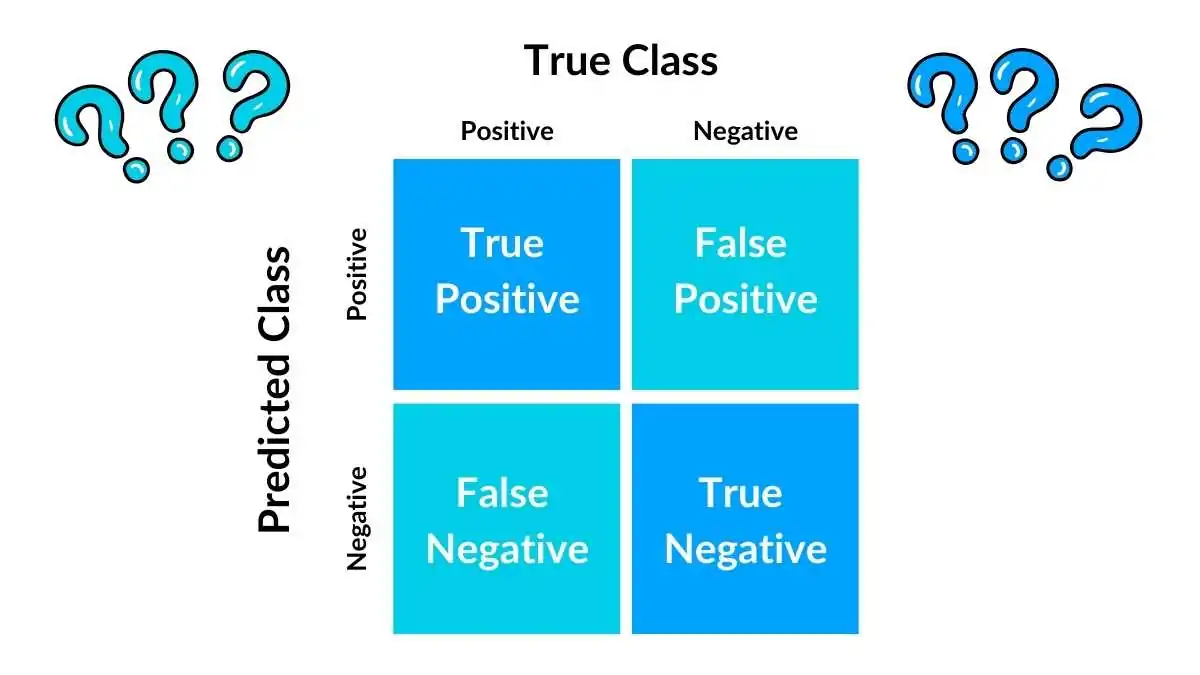

**Accuracy:**

It measures the overall correctness of the 's predictions. It's calculated as the number of correct predictions (both true positives and true negatives) divided by the total number of predictions.

**Formula:**

 Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)


**Precision:**

This metric focuses on the accuracy of the positive predictions made by your model. Precision tells you, out of all the texts your model predicted as "AI", how many of them were actually "AI".

**Formula:**

 Precision = True Positives / (True Positives + False Positives)


Starting evaluation...


Evaluating:   0%|          | 0/1665 [00:00<?, ?it/s]


Accuracy: 0.9876
Precision: 0.9802
Recall: 0.9940
F1-score: 0.9871


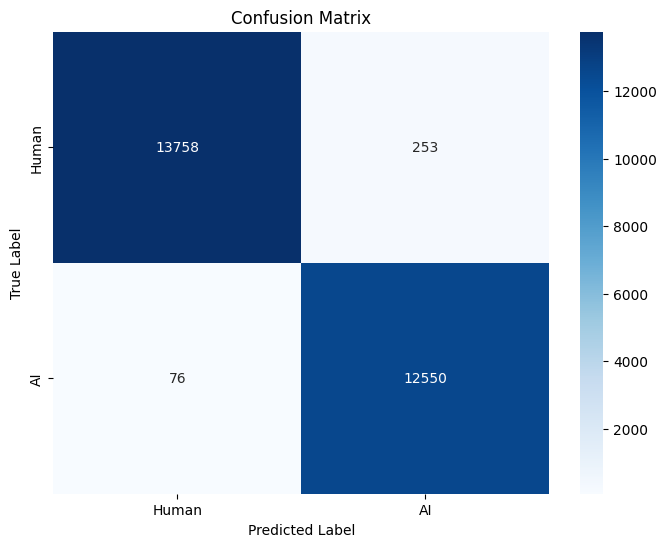

Evaluation complete.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the saved state dictionary
model.load_state_dict(torch.load('/content/drive/MyDrive/tinybert_text_classification_model.pth', map_location=device))

# Evaluation loop
print("\nStarting evaluation...")
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(val_loader_combined, desc='Evaluating'):
        # Move batch to device
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get predictions
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
conf_matrix = confusion_matrix(true_labels, predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Evaluation complete.")

# **Testing**

In [ ]:
import torch

#Load the saved state dictionary
model.load_state_dict(torch.load('/content/drive/MyDrive/tinybert_text_classification_model.pth', map_location=device))

text_human_example = """Climate change has become an indigent topic in our day-to-day life. From bush fires in New South Wales and
Victoria to the wildlife forest fires in California, it has become an inevitable subject that needs more attention.
One of the vital causes of climate change is the disappearance or extinction of important species. The species
could range from insects to wild mammals. Hence, it is crucial to trace the location species that play a vital role
in the food chain and ecosystem to further study and conserve. We introduce a novel method to extract the
geographical coordinates of localities and the distribution of species from georeferenced maps. This is done
through a series of processing steps. We propose a software toolbox that extracts maps from the textbooks,
occurrence points (distribution points of the species) from these maps and finally, georeferencing and
postprocessing the maps to extract the geographical coordinates of the occurrence points. The data relating to the
distribution of species, their habitats would pave the way for the study of functional traits or habitats of species
with their abiotic properties of the environment (Zeuss, 2020).
"""
text_ai_example = """
Global warming poses a significant threat to our planet. To ensure a sustainable future, we must take urgent action to combat climate change. Without meaningful change, the long-term consequences could be devastating for the environment and countless species.

"""

#text_ai_example = """
#The CPU (Central Processing Unit), often referred to as the "brain" of the computer, is a critical hardware component that performs most of the processing inside a computer. It executes instructions from programs by performing basic arithmetic, logic, control, and input/output (I/O) operations.
#"""


# Ensure model, tokenizer, and device are available from previous cells

# Function to classify a single text and print the result
def classify_and_print(text):
    cleaned_text = clean_text(text)
    encoded_input = tokenizer([cleaned_text], padding=True, truncation=True, return_tensors='pt').to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(**encoded_input)
        logits = outputs.logits

    probabilities = torch.softmax(logits, dim=1)
    predicted_class_index = torch.argmax(probabilities, dim=1).item()
    confidence_score = probabilities[0, predicted_class_index].item()

    class_labels = {0: 'Human', 1: 'AI'}
    predicted_class_label = class_labels[predicted_class_index]

    print(f"Text: '{text}'")
    print(f"Predicted: {predicted_class_label}")
    print(f"Confidence: {confidence_score:.4f}")
    print("-" * 30)

# Classify and print results for both examples
classify_and_print(text_human_example)
classify_and_print(text_ai_example)

Text: 'Mapping and modeling distribution species have become increasingly important for various
management and decision support purposes.
'
Predicted: Human
Confidence: 1.0000
------------------------------
Text: '
Global warming poses a significant threat to our planet. To ensure a sutainable future, we must take urgent action to combat climate change. Without meaningful change, the long-term consequences could be devastating for the environment and countless species.

'
Predicted: AI
Confidence: 0.9996
------------------------------


In [ ]:
# Display examples of AI-based text from the dataset
if 'label' in df.columns and 1 in df['label'].unique():
    ai_texts = df[df['label'] == 1]

    print("Examples of AI-based text from the dataset:")
    # Display a few examples from the 'abstract' or 'combined_text' column
    if 'combined_text' in ai_texts.columns:
        for i, text in enumerate(ai_texts['combined_text'].head()):
            print(f"Example {i+1}:\n{text}\n{'-'*30}")
    elif 'abstract' in ai_texts.columns:
         for i, text in enumerate(ai_texts['abstract'].head()):
            print(f"Example {i+1}:\n{text}\n{'-'*30}")
    else:
        print("Neither 'combined_text' nor 'abstract' column found in the dataframe.")
else:
    print("The 'label' column with value 1 (AI) was not found in the dataset.")

Examples of AI-based text from the dataset:
Example 1:


"Epidemiological and Clinical Characteristics of Childhood Pandemic 2009 H1N1 Virus Infection: An Observational Cohort Study" examines the clinical features, disease manifestations, and outcomes in children who were infected with pandemic-associated influenza A (H1N1) virus during 2009. During this season it was estimated that between 11%-21% of symptomatic global population suffered from this seasonal outbreak. Despite widespread availability of both prophylactic as well as treatment measures like neuraminidase inhibitors available for disease control; major morbidity occurred amongst pediatric populations due to different epidemiological profiles compared to adults associated with the novel pandemic strain. The objective of this prospective observational cohort study is to investigate epidemiologically related factors along with clinical characteristics among hospitalized pediatric patients towards ascertaining the severity mar

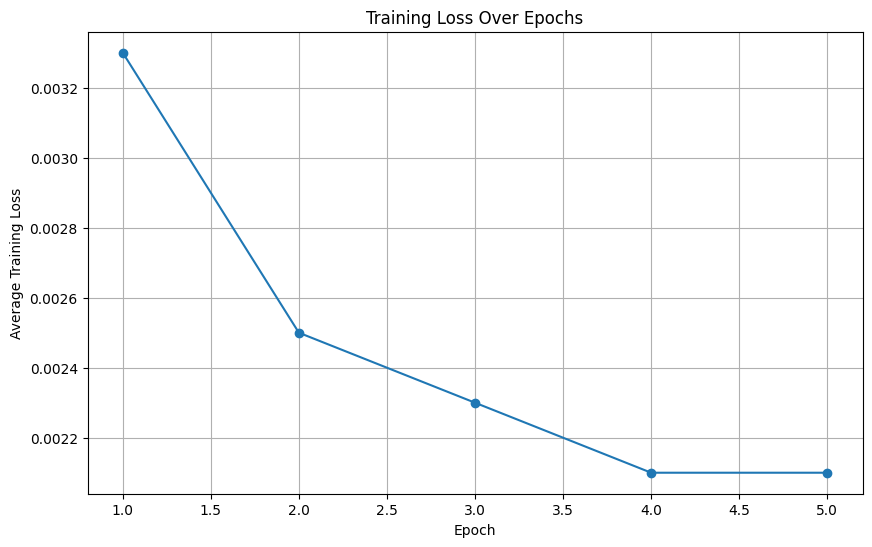

In [ ]:
import matplotlib.pyplot as plt

train_losses = [0.0033, 0.0025, 0.0023, 0.0021, 0.0021]
epochs_list = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_list, train_losses, marker='o', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Training Loss')
plt.grid(True)
plt.show()